In [4]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [5]:
df = pd.read_csv("insurance.csv")

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


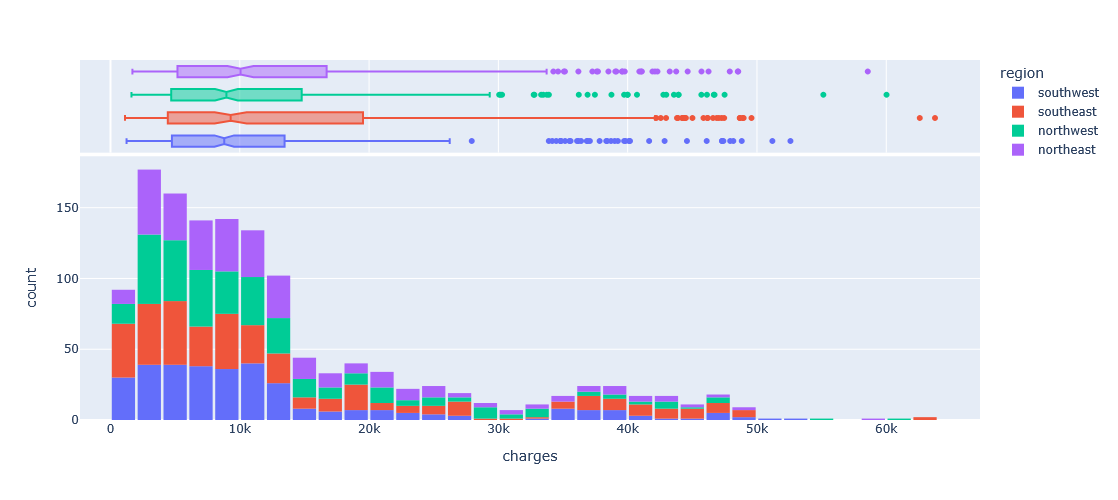

In [9]:
fig = px.histogram(df,x = "charges",marginal = "box",color = "region",nbins = 47,height = 500)
fig.update_layout(bargap = 0.1)
fig.show()

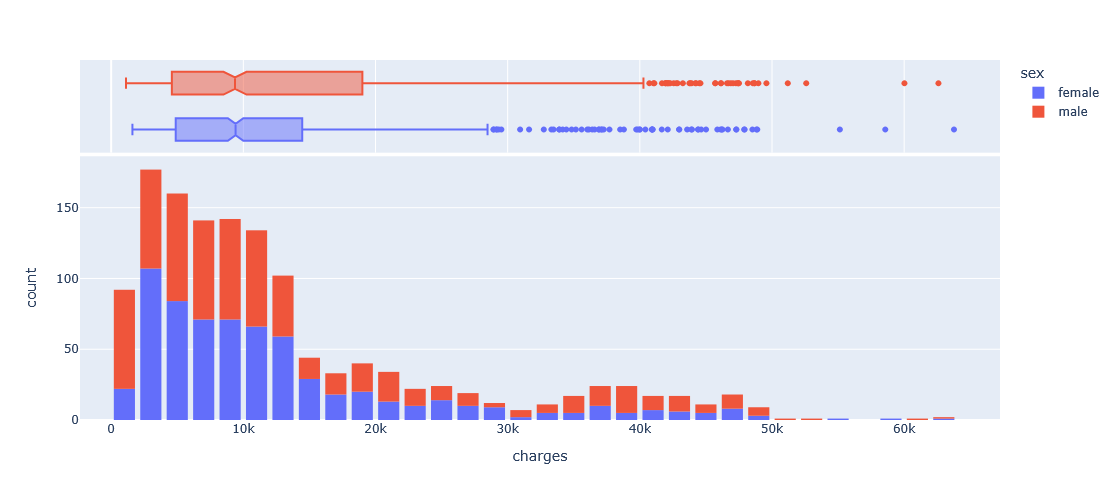

In [10]:
fig = px.histogram(df, x = "charges",marginal = "box", color = "sex",height = 500)
fig.update_layout(bargap = 0.2)
fig.show()

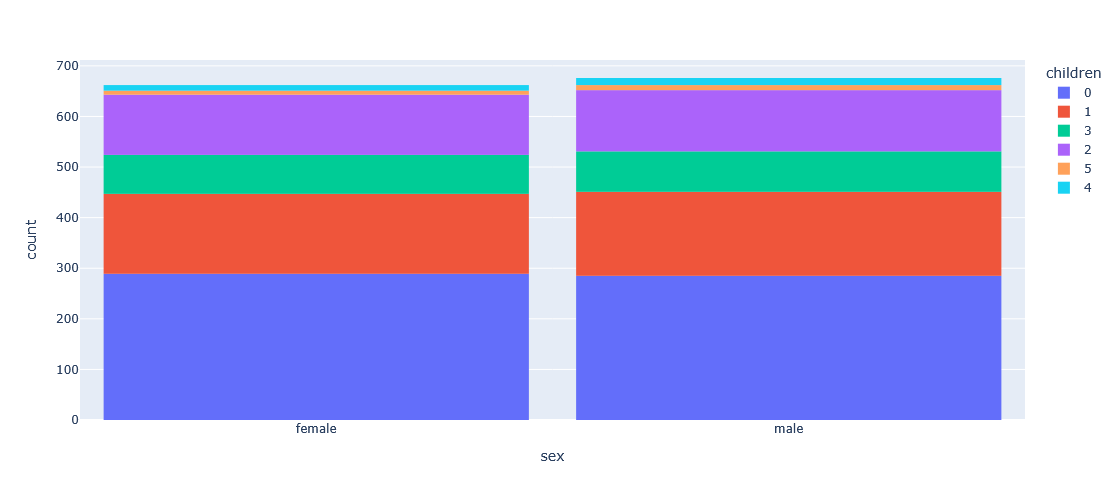

In [11]:
fig = px.histogram(df, x = "sex", color = "children",height = 500 , width = 300)
fig.update_layout(bargap = 0.1)
fig.show()

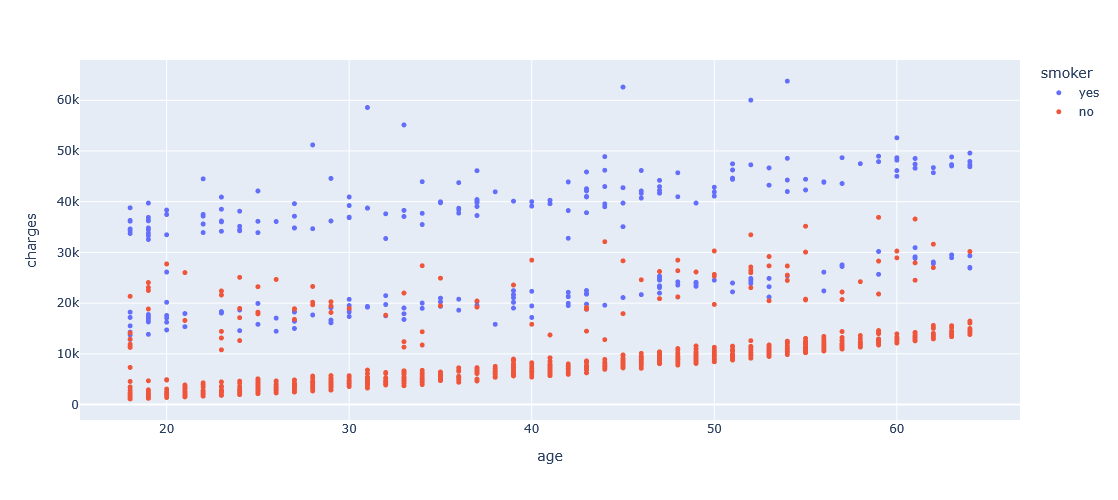

In [12]:
fig = px.scatter(df,x = 'age', y = 'charges',color = 'smoker',hover_data = ['sex'],height = 500)
fig.update_traces(marker_size = 5)
fig.show()

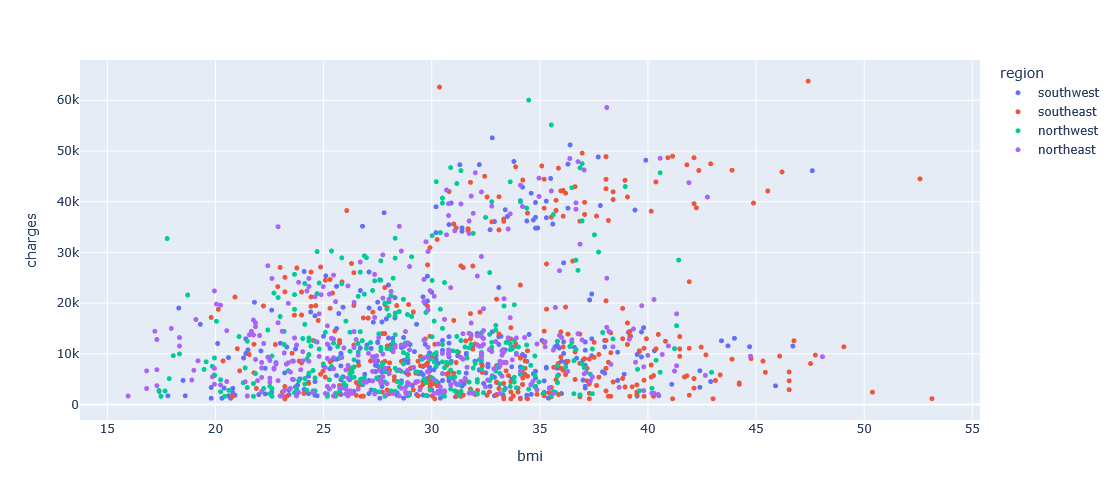

In [13]:
fig = px.scatter(df, x = 'bmi', y = 'charges', color = 'region' , hover_data = ['sex'],height = 500)
fig.update_traces(marker_size = 5)
fig.show()

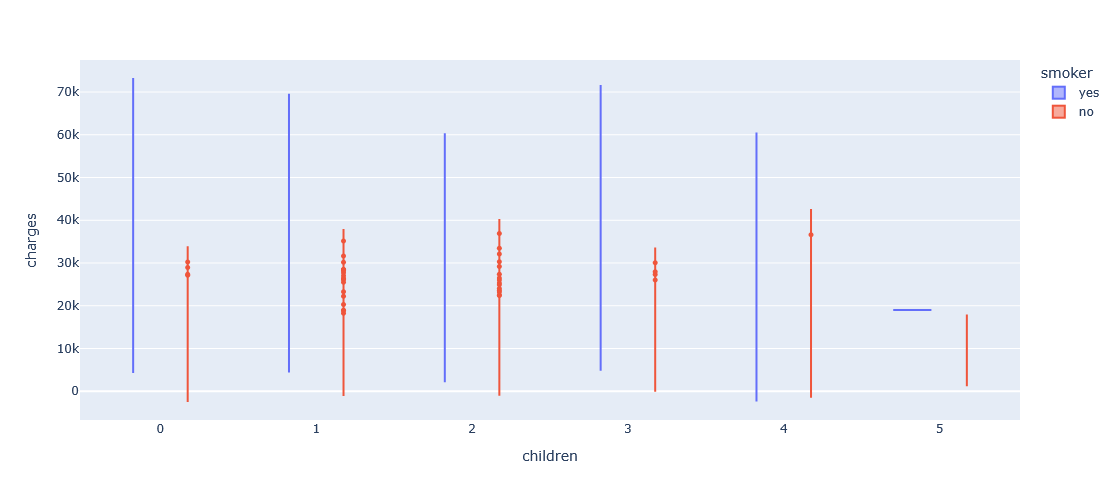

In [14]:
fig = px.violin(df, x = 'children', y = 'charges', color = 'smoker' , hover_data = ['sex'],height = 500)
fig.update_traces(marker_size = 5)
fig.show()

In [15]:
smokers_value = {"no": 0 , "yes" : 1}
smokers_value = df.smoker.map(smokers_value)

In [16]:
df.corr(numeric_only = True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Heat map Matrix')

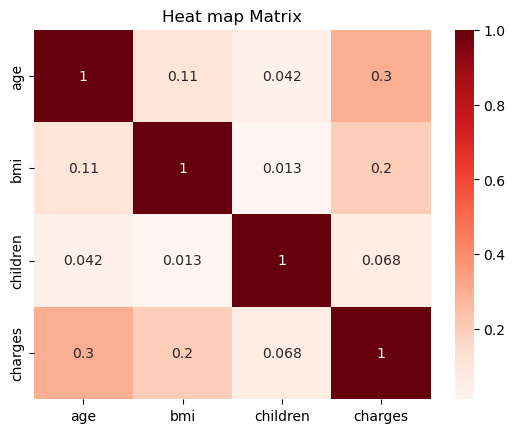

In [17]:
sns.heatmap(df.corr(numeric_only = True),cmap = "Reds" ,annot = True)
plt.title("Heat map Matrix")

In [18]:
non_smoker_df = df[df.smoker == "no"]

<Axes: xlabel='age', ylabel='charges'>

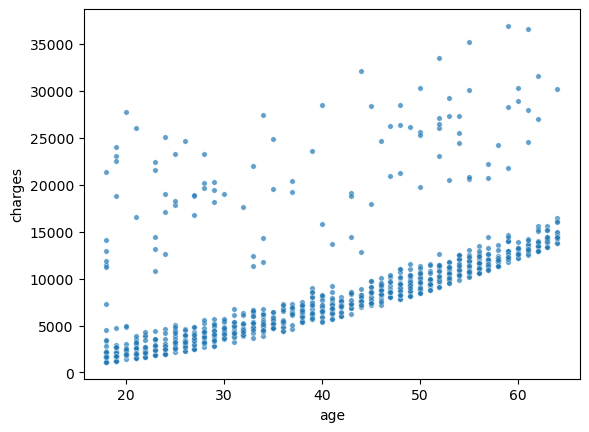

In [19]:
sns.scatterplot(data = non_smoker_df , x = "age", y = 'charges' , alpha = 0.7 ,s = 15)

In [33]:
def estimate_charges(age, w , b):
    return age* w + b

In [21]:
w = 50 
b = 100

In [22]:
age = non_smoker_df.age
estimate_charges = estimate_charges(age, w, b)

Text(0.5, 1.0, 'estimate charges vs age')

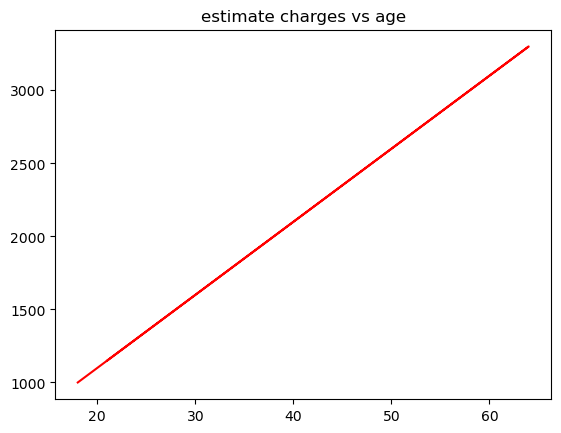

In [23]:
plt.plot(age , estimate_charges,'r')
plt.title("estimate charges vs age")

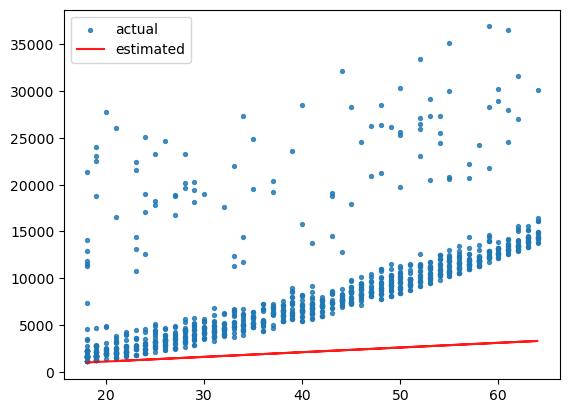

In [24]:
target = non_smoker_df.charges
plt.scatter(age, target, s=8, alpha = 0.8)

plt.plot(age, estimate_charges ,"r",alpha = 0.9)
plt.legend(["actual","estimated"])

In [34]:
def try_parameter(w,b):
    age = non_smoker_df.age
    target = non_smoker_df.charges

    estimate_charge = estimate_charges(age, w, b)
    
    plt.scatter(age, target, s=8, alpha = 0.8)
    
    plt.plot(age, estimate_charge ,"r",alpha = 0.9)
    plt.legend(["actual","estimated"])

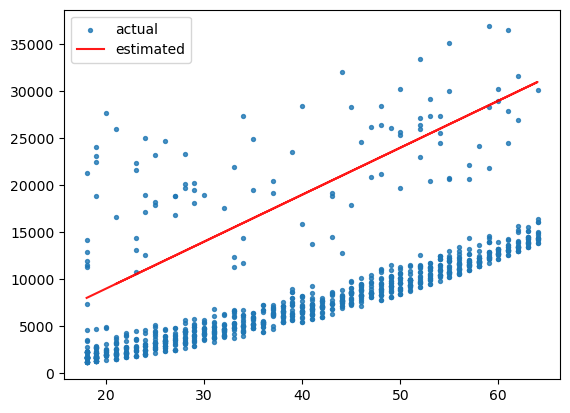

In [35]:
try_parameter(500, -1000)

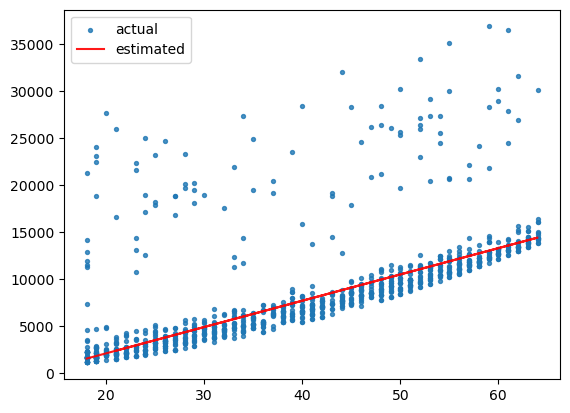

In [36]:
try_parameter(280,-3500)

In [30]:
def rems(target,predicted):
    return np.sqrt(np.mean(np.square(target-predicted)))

In [47]:
def try_parameter(w,b):
    age = non_smoker_df.age
    target = non_smoker_df.charges
    predicted = estimate_charges(non_smoker_df.age,w,b)

    estimate_charge = estimate_charges(age, w, b)
    loss = rems(target,predicted)
    print("RMSE loss:", loss)
    plt.scatter(age, target, s=8, alpha = 0.8)
    
    plt.plot(age, estimate_charge ,"r",alpha = 0.9)
    plt.legend(["actual","estimated"])

RMSE loss: 4753.176967946348


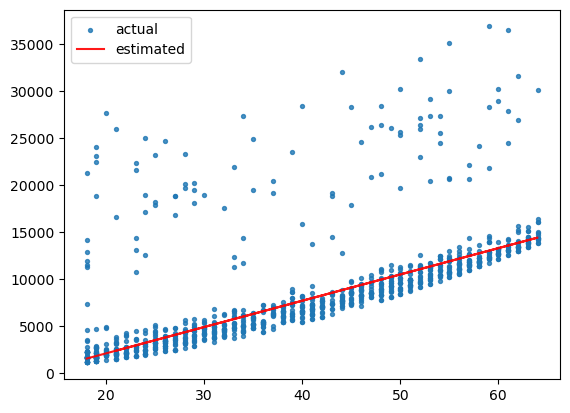

In [48]:
try_parameter(280,-3500)

In [53]:
model = LinearRegression()

In [39]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

model.fit(inputs,targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
#w
model.coef_

array([267.24891283])

In [41]:
#b
model.intercept_

np.float64(-2091.4205565650846)

RMSE loss: 4856.28938265913


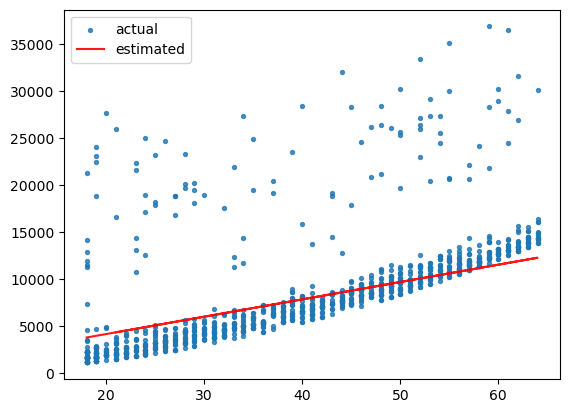

In [49]:
try_parameter(model.coef_,model.intercept_)

In [43]:
#stochastic gradient descent
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(alpha = 0.1 , penalty = 'l1')

In [44]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

In [45]:
model.fit(inputs,targets)

,loss,'squared_error'
,penalty,'l1'
,alpha,0.1
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


RMSE loss: 4856.28938265913


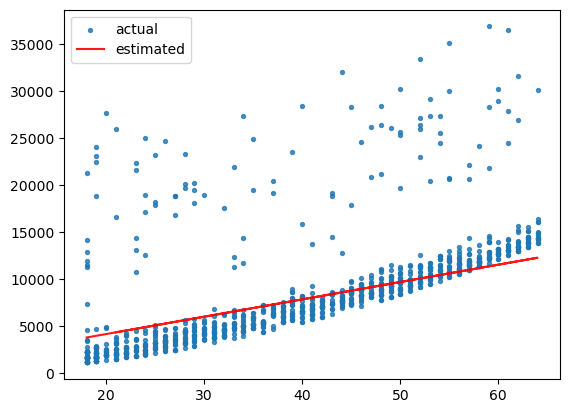

In [50]:
try_parameter(model.coef_,model.intercept_)

In [52]:
#using multiple values
inputs, target = non_smoker_df[['age','bmi','children']],non_smoker_df.charges

In [56]:
model = LinearRegression().fit(inputs,target)

In [58]:
predictions = model.predict(inputs)

In [62]:
loss = rems(targets,predictions)
print("loss",loss)

loss 4608.470405038246


In [63]:
#using whole database for predictions
inputs,target = df[['age','bmi','children']],df.charges
model = LinearRegression().fit(inputs,target)

In [66]:
predictions = model.predict(inputs)
loss = rems(target,predictions)
print("loss",loss)

loss 11355.317901125973


In [67]:
#using binary categorising to change the data of smokers to 0 and 1 and using them in the model training

In [69]:
smoker_datachange = {"no": 0,"yes":1}
df['smoker_code'] = df.smoker.map(smoker_datachange)

In [70]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [71]:
inputs,target = df[['age','bmi','children','smoker_code']],df.charges

In [76]:
model = LinearRegression().fit(inputs,target)

predictions = model.predict(inputs)

loss = rems(target,predictions)
print("loss",loss)

loss 6056.439217188081


In [77]:
#reduced from 11355 to 6056

In [79]:
sex_datacode = {"female": 0 ,"male":1}

In [80]:
df['sex_code'] = df.sex.map(sex_datacode)

In [81]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [82]:
inputs,target = df[['age','bmi','children','smoker_code','sex_code']],df.charges

In [83]:
model = LinearRegression().fit(inputs,target)

predictions = model.predict(inputs)

loss = rems(target,predictions)
print("loss",loss)

loss 6056.100708754546


In [85]:
df.charges.corr(df.sex_code)

np.float64(0.057292062202025415)

In [86]:
#one hot encoding for regions

In [88]:
from sklearn import preprocessing

In [92]:
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(df[['region']]).toarray()
one_hot

In [94]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [96]:
inputs = df[['age','bmi','children','smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']]
target = df.charges

model = LinearRegression().fit(inputs,target)

predictions = model.predict(inputs)
loss = rems(target,predictions)
print("loss:",loss)

loss: 6041.679651174452


In [100]:
#only has 10$ change
#changing the value of age bmi and children to -1 to 1 for better interpretation

In [101]:
from sklearn.preprocessing import StandardScaler

In [104]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler().fit(df[numeric_cols])
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [107]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = df[cat_cols].values

In [108]:
inputs = np.concatenate((scaled_inputs,categorical_data),axis = 1)
targets = df.charges

model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)
loss = rems(targets, predictions)
print("loss:",loss)

loss: 6041.6796511744515


In [110]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [112]:
#1 is the intercept

In [113]:
new_customer = [[30,30,2,1,0,0,1,0,0]]

In [121]:
import warnings
warnings.filterwarnings("ignore")
scaler.transform([[30,30,2]])

array([[-0.65555117, -0.10882659,  0.75107928]])

In [118]:
model.predict([[-0.65555117, -0.10882659,  0.75107928,1,0,0,1,0,0]])

array([30389.52733713])

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
input_train,input_test,target_train,target_test = train_test_split(inputs,targets,test_size = 0.1)

In [129]:
model = LinearRegression().fit(input_train,target_train)

prediction_test = model.predict(input_test)
loss = rems(target_test, prediction_test)
print("Test_loss:",loss)

Test_loss: 5779.026606440213


In [130]:
prediction_train = model.predict(input_train)
loss = rems(target_train, prediction_train)
print("Train_loss:",loss)

Train_loss: 6072.7379624314435
